# Crear modelos base


En este notebook se crearán dos modelos, uno simple y otro aumentado, con el fin de comparar sus resultados y tener unas primeras nociones acerca de como implementar la clasificación de las imágenes


In [2]:
import sys

sys.path.append("../")  # Add the parent directory to the Python path

In [3]:
from src.models.train import ModelTrainer, ModelConfiguration
from src.models.evaluator import ModelEvaluator
from src.data.data_loader import data_loader, data_loader_test
from IPython.display import Image

## Carga de datos


La carga de datos se realiza de igual forma que se explicó en el anterior notebook


In [3]:
train_data, val_data = data_loader("../data/train", (150, 150), batch_size=128)

Found 12777 files belonging to 6 classes.
Using 10222 files for training.
Using 2555 files for validation.


## Entrenamiento del modelo base y aumentado


### Clase `ModelTrainer`

La clase `ModelTrainer` se utiliza para inicializar un objeto que es una capa de abstracción construida sobre Keras para poder entrenar fácilmente los modelos que son de aplicación a este proyecto.

#### Argumentos del Método:

- `model_name` (str): Nombre del modelo.
- `model_config` (ModelConfiguration): Enum que especifica la configuración del modelo.
- `classes_predicted` (int): Número de clases a predecir.


In [4]:
simplemodel_trainer = ModelTrainer("experiment", ModelConfiguration.SIMPLE, 6)

#### Argumentos del Método `train`:

- `train_data`: Datos de entrenamiento.
- `validation_data`: Datos de validación.
- `epochs` (int, opcional): Número de épocas de entrenamiento.

Este método train cuenta con algunas funcionalidades interesantes:

- Realiza un logging a través de `Comet` para el seguimiento de los experimentos
- Guarda el modelo final en la ruta _/models/{ nombre_pasado_a_model_trainer }_


In [12]:
simplemodel_trainer.train(train_data, val_data, epochs=25)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0   

### Análisis de los resultados del entrenamiento


Empleando este notebook con la clase y el método antes descritos se han entreando dos modelos, el simple y el augmented. La configuración de ambos puede encontrarse en _src/models_.

- El modelo `simple` cuenta con dos capas de convolución y max-pooling, y dos capas densas par predecir el output
- El modelo `augmented` es una versión más potente del anterior. Cuenta con cinco capas de convolución y max-pooling, y dos capas densas par predecir el output

A continuación se muestran las capturas extraídas de Comet, donde se pueden inspeccionar los resultados del entrenamiento:


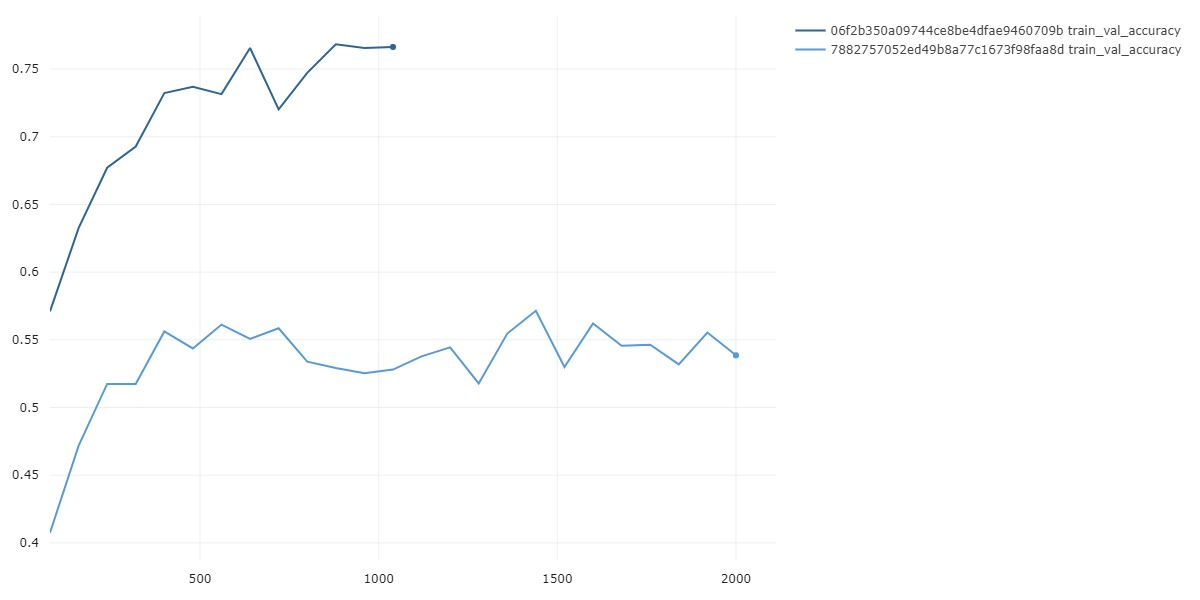

In [4]:
imagen_ruta = "../images/simple_train_val_accuracy_VS_step.jpeg"

Image(filename=imagen_ruta)

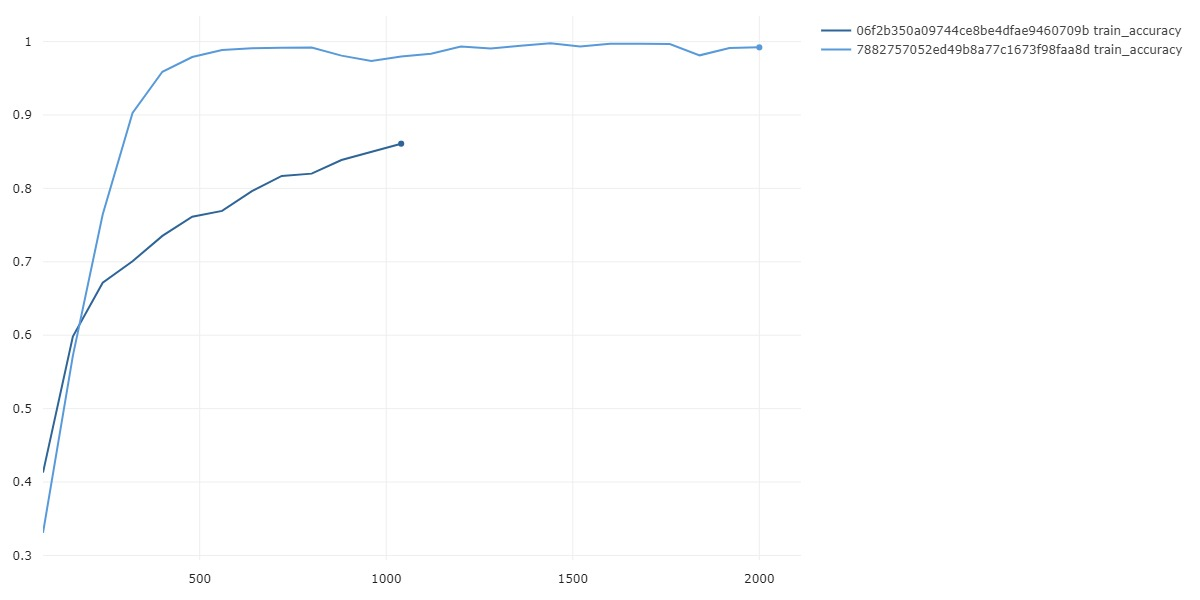

In [5]:
imagen_ruta2 = "../images/simple_train_accuracy_VS_step.jpeg"

Image(filename=imagen_ruta2)

#### Diferencias en el Rendimiento del Modelo

Se observa una diferencia significativa en el rendimiento de estos dos modelos, especialmente en el conjunto de validación. El "Modelo Aumentado" supera notablemente al "Modelo Simple" en términos de precisión en el conjunto de validación. Esto se debe a que el "Modelo Aumentado" tiene más capas convolucionales, lo que le permite detectar características más pequeñas que se combinan para formar características más grandes y complejas. Esta capacidad de detección de características más avanzadas se traduce en un mejor rendimiento en la clasificación de datos desconocidos.

#### Sobreajuste en el "Modelo Simple"

Es importante destacar que, aunque el "Modelo Simple" muestra una precisión cercana a 1 en el conjunto de entrenamiento, esto no indica necesariamente un rendimiento óptimo. Estos altos valores pueden ser indicativos de sobreajuste (overfitting), donde el modelo memoriza los datos de entrenamiento en lugar de aprender patrones generales. Esta memorización no se traduce en un mejor rendimiento en datos no vistos, como se refleja en la precisión más baja en el conjunto de validación.

#### Tiempo de Entrenamiento

También es notable que el "Modelo Aumentado" logra converger más rápidamente durante el entrenamiento en comparación con el "Modelo Simple". Este comportamiento se debe a la implementación de una función de "early stopping" en la clase `ModelTrainer`, que detiene el entrenamiento una vez que el modelo alcanza un nivel óptimo de rendimiento en el conjunto de validación.


## Test Models


Ahora que se ha comparado el rendimiento de los modelos en el set de train/val, es momento de hacerlo en un set que ninguno de los dos haya utilizado para entrenrse, es decir el set de test. </br>

Para tal propósito se ha creado una clase `ModelEvaluator`, con un funcionamiento similar a `ModelTrainer`, que contiene un método evaluate para obtener las métricas


In [6]:
# Carga de datos
test_data = data_loader_test("../data/test", (150, 150))

Found 4257 files belonging to 6 classes.


In [7]:
model_evaluator_simple = ModelEvaluator("../models/simple-overfit")
model_evaluator_simple.evaluate(test_data)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, keras, tensorboard.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\pablo\\Documents\\Master\\Modulo_8\\notebooks' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/pablotorresr/modulo8/8a07086dcb3440fa9d861dc06d82a44c



134/134 [==============================] - 9s 65ms/step - loss: 4.0125 - accuracy: 0.5455


COMET WARNING: Cannot safely convert [4.0124945640563965, 0.5454545617103577] object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/pablotorresr/modulo8/8a07086dcb3440fa9d861dc06d82a44c
COMET INFO:   Metrics:
COMET INFO:     test_metrics : [4.0124945640563965, 0.5454545617103577]
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages  

In [8]:
model_evaluator_augmented = ModelEvaluator("../models/aumented")
model_evaluator_augmented.evaluate(test_data)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, keras, tensorboard.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\pablo\\Documents\\Master\\Modulo_8\\notebooks' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/pablotorresr/modulo8/b9a49af73824488aaa1c8d756d94a743



134/134 [==============================] - 7s 50ms/step - loss: 0.6449 - accuracy: 0.7782


COMET WARNING: Cannot safely convert [0.6448973417282104, 0.778247594833374] object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/pablotorresr/modulo8/b9a49af73824488aaa1c8d756d94a743
COMET INFO:   Metrics:
COMET INFO:     test_metrics : [0.6448973417282104, 0.778247594833374]
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages    

#### Análisis de los resultados sobre el set de test

Se observa que el modelo aumentado tiene una precisión sobre el set de test de `0.7782` frente a `0.5454` del modelo simple </br>

**Se concluye que el modelo aumentado es superior al anterior**
